In [0]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

In [2]:
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [0]:
# import keras.datasets.cifar10
(X_train, Y_train), (X_test, Y_test) = tf.keras.datasets.cifar10.load_data()

In [118]:
type(X_train)

numpy.ndarray

In [0]:
y_train = tf.keras.utils.to_categorical(Y_train, 10)
y_test = tf.keras.utils.to_categorical(Y_test, 10)
X_train = X_train/255 - 0.5
X_test = X_test/255 - 0.5

In [0]:
tf.keras.backend.clear_session()
model = tf.keras.Sequential([
    tf.keras.layers.Conv2D(32, (3,3),activation = "relu",input_shape = (32,32,3), padding = "same"),
    # tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(32, (3,3),activation = "relu", padding = "same"),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Dropout(0.25),
    tf.keras.layers.Conv2D(64, (3,3),activation = "relu", padding = "same"),
    # tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(64, (3,3),activation = "relu", padding = "same"),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Dropout(0.25),
    tf.keras.layers.Conv2D(128, (3,3),activation = "relu", padding = "same"),
    tf.keras.layers.Conv2D(128, (3,3),activation = "relu", padding = "same"),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Dropout(0.25),
    
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128),
    tf.keras.layers.LeakyReLU(),
    tf.keras.layers.Dropout(0.5),

    tf.keras.layers.Dense(10),
    tf.keras.layers.Softmax()

])

In [6]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 32, 32, 32)        896       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 32, 32, 32)        9248      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 16, 16, 32)        0         
_________________________________________________________________
dropout (Dropout)            (None, 16, 16, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 16, 16, 64)        18496     
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 16, 16, 64)        36928     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 8, 8, 64)          0

In [0]:
optimizer = tf.keras.optimizers.Adam(learning_rate = 0.001, epsilon = 1 )
model.compile(
    optimizer = "adam",
    loss = "categorical_crossentropy",
    metrics = ["accuracy"]
)

In [0]:
history = model.fit(X_train, y_train, batch_size = 10000, epochs = 100, verbose = 1, shuffle= True, validation_data = (X_test, y_test))

In [8]:
datagen = keras.preprocessing.image.ImageDataGenerator(width_shift_range=0.1, height_shift_range=0.1, horizontal_flip=True)
# prepare iterator
it_train = datagen.flow(X_train, y_train, batch_size=64)
# fit model
steps = int(X_train.shape[0] / 64)
history = model.fit_generator(it_train, steps_per_epoch=steps, epochs=200, validation_data=(X_test, y_test), verbose=1)

Instructions for updating:
Please use Model.fit, which supports generators.
Epoch 1/200
781/781 [==============================] - 23s 29ms/step - loss: 1.6716 - accuracy: 0.3777 - val_loss: 1.2835 - val_accuracy: 0.5285
Epoch 2/200
781/781 [==============================] - 23s 29ms/step - loss: 1.2541 - accuracy: 0.5478 - val_loss: 1.0084 - val_accuracy: 0.6378
Epoch 3/200
781/781 [==============================] - 22s 29ms/step - loss: 1.0755 - accuracy: 0.6186 - val_loss: 1.0367 - val_accuracy: 0.6472
Epoch 4/200
781/781 [==============================] - 22s 29ms/step - loss: 0.9714 - accuracy: 0.6587 - val_loss: 0.8135 - val_accuracy: 0.7114
Epoch 5/200
781/781 [==============================] - 22s 29ms/step - loss: 0.9051 - accuracy: 0.6853 - val_loss: 0.7562 - val_accuracy: 0.7351
Epoch 6/200
781/781 [==============================] - 22s 28ms/step - loss: 0.8551 - accuracy: 0.7013 - val_loss: 0.8334 - val_accuracy: 0.7076
Epoch 7/200
781/781 [==============================] -

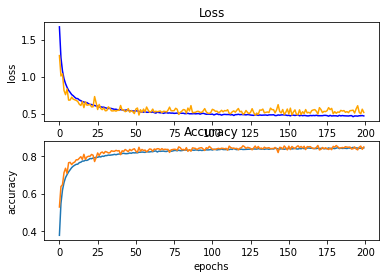

In [9]:
plt.subplot(2,1,1)
plt.title("Loss")
plt.xlabel("epochs")
plt.ylabel("loss")

plt.plot(history.history['loss'], color = 'blue', )
plt.plot(history.history['val_loss'], color = 'orange')
# plt.show()
plt.subplot(2,1,2)
plt.title("Accuracy")
plt.xlabel("epochs")
plt.ylabel("accuracy")
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.savefig("model2" + "_plot.png")
plt.show()

plt.close()

In [0]:
model.save_weights('model2.h5')

In [0]:
from sklearn.metrics import confusion_matrix, accuracy_score

In [0]:
prediction = model.predict(X_test)

In [0]:
y_test_class = np.argmax(prediction, axis = 1)

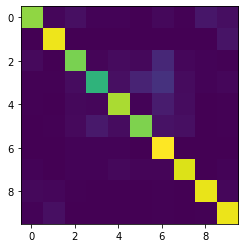

0.8486


In [14]:
matrix = confusion_matrix(Y_test, y_test_class)
# plt.plot(matrix)
plt.imshow(matrix)
plt.savefig('model2' + '_confusion-matrix.png')
plt.show()
print(accuracy_score(Y_test, y_test_class))